In [3]:
!pip install matplotlib
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [148]:
!pip install gzip
!pip install shutil
import gzip
import shutil

with gzip.open(r'C:\Users\bjeyav19\Downloads\train.gz','rb') as f_in:
    with open(r'C:\Users\bjeyav19\Downloads\train.csv','wb') as f_out:
        shutil.copyfileobj(f_in,f_out)

ERROR: Could not find a version that satisfies the requirement gzip (from versions: none)
ERROR: No matching distribution found for gzip
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [4]:
train = pd.read_csv(r'C:\Users\bjeyav19\Downloads\train.csv',nrows=50000)
print(train.columns)
print(train.head(5))
print(train.describe())
print(train.dtypes)

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')
                     id  click      hour    C1  banner_pos   site_id  \
0   1000009418151094273      0  14102100  1005           0  1fbe01fe   
1  10000169349117863715      0  14102100  1005           0  1fbe01fe   
2  10000371904215119486      0  14102100  1005           0  1fbe01fe   
3  10000640724480838376      0  14102100  1005           0  1fbe01fe   
4  10000679056417042096      0  14102100  1005           1  fe8cc448   

  site_domain site_category    app_id app_domain  ... device_type  \
0    f3845767      28905ebd  ecad2386   7801e8d9  ...           1   
1    f3845767      28905ebd  ecad2386   7801e8d9  ...           1   
2    f3845767      28905ebd  ecad2386   7801e8d9  

In [5]:
var = 'device_type'
data = pd.concat([train['click'],train[var]],axis=1)

1    46261
0     2084
4     1550
5      105
Name: device_type, dtype: int64

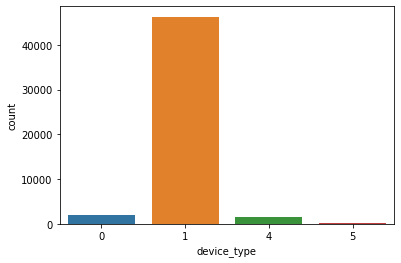

In [6]:
sns.countplot(x="device_type",data=data)
data.loc[:,"device_type"].value_counts()

In [7]:
device_type_table = pd.crosstab(index=train['device_type'],columns=train['click'])
device_type_table

click,0,1
device_type,,
0,1607,477
1,38106,8155
4,1429,121
5,94,11


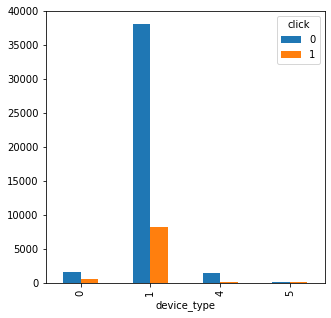

In [8]:
device_type_table.plot(kind="bar",figsize=(5,5),stacked=False)

In [9]:
pearson = train.corr(method="pearson")

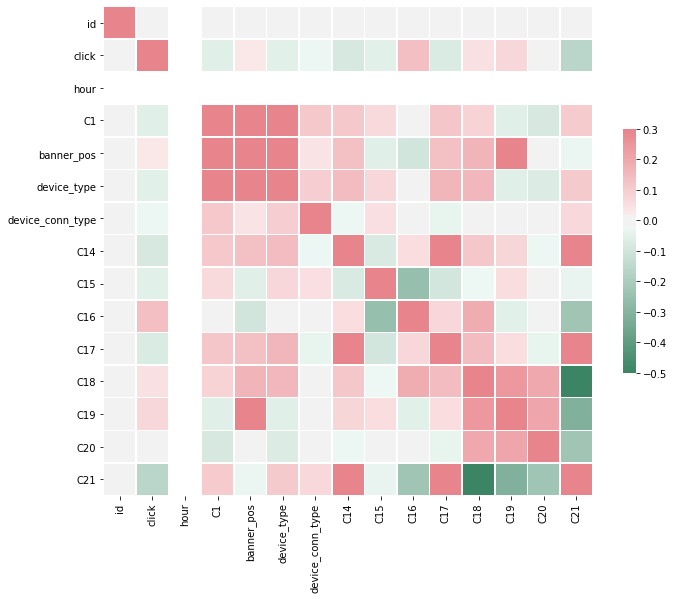

In [10]:
f , ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(150,10,as_cmap=True)

sns.heatmap(pearson,cmap=cmap,vmax=.3,center=0,
           square = True, linewidths=0.5, cbar_kws={"shrink": 0.5})

In [11]:
train.isnull().sum().sort_values(ascending=False)

C21                 0
C20                 0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
id                  0
dtype: int64

In [12]:
train = train.drop('id',axis = 1)
train = train.drop('device_id',axis =1)
train = train.drop('site_id',axis =1)
train = train.drop('device_ip',axis =1)
train = train.drop('hour',axis =1)
train.head()


,click,C1,banner_pos,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1005,0,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,0,1005,0,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,0,1005,0,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,0,1005,0,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,0,1005,1,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


In [13]:
train.shape

(50000, 19)

In [14]:
df = pd.get_dummies(train)
#df = train

In [15]:
df.head()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,...,device_model_ff16d623,device_model_ff2a3543,device_model_ff607a1a,device_model_ff717dd1,device_model_ff91ea03,device_model_ffb16766,device_model_ffcd1497,device_model_ffe3ae81,device_model_ffe69079,device_model_ffeafe15
0,0,1005,0,1,2,15706,320,50,1722,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1005,0,1,0,15704,320,50,1722,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1005,0,1,0,15704,320,50,1722,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1005,0,1,0,15706,320,50,1722,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1005,1,1,0,18993,320,50,2161,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = df.drop('click',axis=1)
Y = df['click']
X.shape

(50000, 3314)

In [17]:
!pip install sklearn
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,test_size =0.2,random_state=5)

In [18]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(40000, 3314)
(40000,)
(10000, 3314)
(10000,)


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

model = DecisionTreeClassifier()

In [20]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
predict = model.predict(X_test)

In [22]:
accuracy_score(Y_test,predict)

0.8082

In [23]:
pd.DataFrame(confusion_matrix(Y_test,predict),columns = ["Predicted Not-Clicked","Predicted Clicked"],index=["Actual Not-Clicked","Actual Clicked"])

,Predicted Not-Clicked,Predicted Clicked
Actual Not-Clicked,7756,485
Actual Clicked,1433,326


In [24]:
pos_prob = model.predict_proba(X_test)[:,1]
print('The ROC AUC on testing set: {0:.3f}'.format(roc_auc_score(Y_test,pos_prob)))

The ROC AUC on testing set: 0.634


In [25]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[5,10,20,50,100,None]}

decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree,parameters)
grid_search.fit(X_train,Y_train)
print(grid_search)

{'max_depth': 5}


In [26]:
decision_tree_prob = grid_search.best_estimator_
pos_prob = decision_tree_prob.predict_proba(X_test)[:,1]
print('The ROC AUC on testing set: {0:.3f}'.format(roc_auc_score(Y_test,pos_prob)))

The ROC AUC on testing set: 0.698


In [27]:
predict = decision_tree_prob.predict(X_test)
accuracy_score(Y_test,predict)

0.8272

In [28]:
pd.DataFrame(confusion_matrix(Y_test,predict),columns = ["Predicted Not-Clicked","Predicted Clicked"],index=["Actual Not-Clicked","Actual Clicked"])

,Predicted Not-Clicked,Predicted Clicked
Actual Not-Clicked,8005,236
Actual Clicked,1492,267


In [29]:
!pip install pydotplus
!pip install graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz


In [30]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\bjeyav19\graphviz-2.38\release\bin'
dotted = export_graphviz(decision_tree_prob, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)
graph = graphviz.Source(dotted)

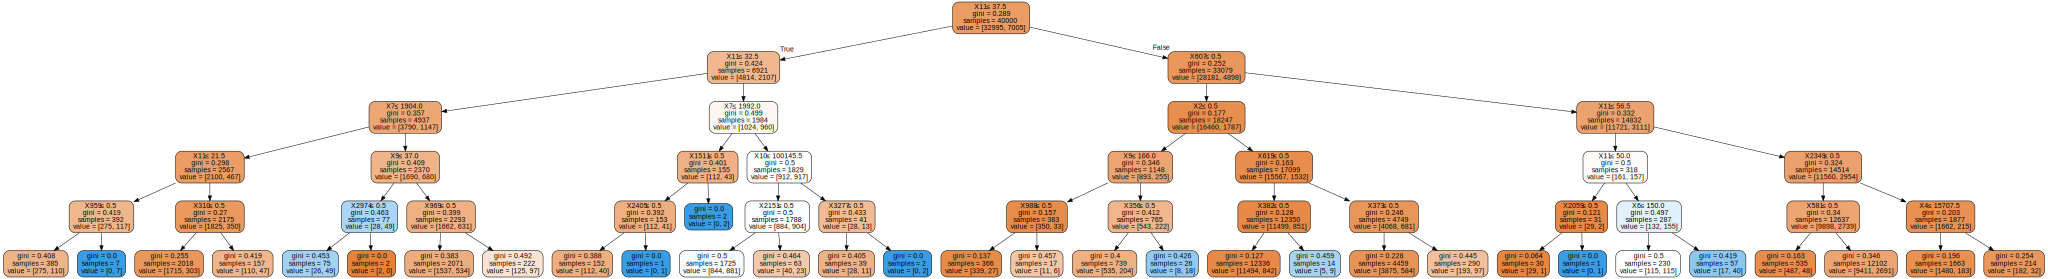

In [31]:
graph

In [32]:
decision_tree_prob

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
X.columns

Index(['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15',
       'C16', 'C17', 'C18', 'C19',
       ...
       'device_model_ff16d623', 'device_model_ff2a3543',
       'device_model_ff607a1a', 'device_model_ff717dd1',
       'device_model_ff91ea03', 'device_model_ffb16766',
       'device_model_ffcd1497', 'device_model_ffe3ae81',
       'device_model_ffe69079', 'device_model_ffeafe15'],
      dtype='object', length=3314)

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train);

In [35]:
predict = model.predict(X_test)

In [36]:
accuracy_score(Y_test,predict)

0.8164

In [37]:
pd.DataFrame(confusion_matrix(Y_test,predict),columns = ["Predicted Not-Clicked","Predicted Clicked"],index=["Actual Not-Clicked","Actual Clicked"])

,Predicted Not-Clicked,Predicted Clicked
Actual Not-Clicked,7835,406
Actual Clicked,1430,329


In [38]:
pos_prob = model.predict_proba(X_test)[:,1]
print('The ROC AUC on testing set: {0:.3f}'.format(roc_auc_score(Y_test,pos_prob)))

The ROC AUC on testing set: 0.644


In [42]:
graph.view

<bound method File.view of <graphviz.files.Source object at 0x000001D49343DD88>>

In [43]:
model

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 20, 50, 100, None]},
        

In [46]:
df.columns

Index(['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18',
       ...
       'device_model_ff16d623', 'device_model_ff2a3543',
       'device_model_ff607a1a', 'device_model_ff717dd1',
       'device_model_ff91ea03', 'device_model_ffb16766',
       'device_model_ffcd1497', 'device_model_ffe3ae81',
       'device_model_ffe69079', 'device_model_ffeafe15'],
      dtype='object', length=3315)

In [47]:
Y_test

24166    1
42699    0
15927    0
7473     0
5070     0
        ..
26109    0
18962    0
4828     0
12217    0
22277    0
Name: click, Length: 10000, dtype: int64

In [48]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)